## Download Composable Overlay <a class="anchor" id="download"></a>

Import the pynq video libraries as well as Composable class and the drivers for the IP.

Download the Composable Overlay using `pynq.Overlay` and grab a handler to the `composable` hierarchy

In [1]:
from pynq import Overlay
from pynq.lib.video import *
from pynq_composable import *
from ipywidgets import widgets, interact, FloatSlider, IntSlider
from pynq.ps import CPU_ARCH, ZYNQ_ARCH

ol = Overlay("cv_dfx_4_pr.bit")
#ol = Overlay("/home/xilinx/jupyter_notebooks/pynq-composable/overlay/cv_dfx_4_pr.bit")

cpipe = ol.composable

## Configure Webcam <a class="anchor" id="setup_cam"></a>

Configure the Webcam and with `VideoStream` class, and start the video

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to connect HDMI output cable to an screen may cause the notebook to hang
</div>

In [2]:
video = VideoStream(ol, source=VSource.OpenCV)

video.start()

## Compose Simple Pipeline <a class="anchor" id="simple-pipeline"></a>

Grab handlers to LUT and compose

In [3]:
print(f"Parent class: {cpipe.__class__.__bases__}, driver: {type(cpipe)}")

gauss = cpipe.gaussianfilter_accel
print(f"Parent class: {gauss.__class__.__bases__}, driver: {type(gauss)}")

rgb2gray = cpipe.rgb2gray_accel
print(f"Parent class: {rgb2gray.__class__.__bases__}, driver: {type(rgb2gray)}")

Parent class: (<class 'pynq.overlay.DefaultHierarchy'>,), driver: <class 'pynq_composable.composable.Composable'>
Parent class: (<class 'pynq_composable.libs.VitisVisionIP'>,), driver: <class 'pynq_composable.libs.Gaussianfilter'>
Parent class: (<class 'pynq.overlay.DefaultIP'>,), driver: <class 'pynq_composable.libs.VitisVisionIP'>


Willy Compose
[]
i 0
l0 <pynq.lib.video.pipeline.PixelPacker object at 0xa1c83a60>
i 1
l0 <pynq_composable.libs.Gaussianfilter object at 0xa2291ce8>
i 2
l0 <pynq_composable.libs.VitisVisionIP object at 0xa2291d00>
i 3
l0 <pynq.lib.video.pipeline.ColorConverter object at 0xb503bac0>
ip <pynq.lib.video.pipeline.PixelPacker object at 0xa1c83a60>
ip <pynq_composable.libs.Gaussianfilter object at 0xa2291ce8>
ip.start()
ip <pynq_composable.libs.VitisVisionIP object at 0xa2291d00>
ip.start()
ip <pynq.lib.video.pipeline.ColorConverter object at 0xb503bac0>


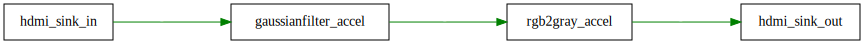

In [5]:
cpipe.compose([cpipe.hdmi_sink_in, gauss, rgb2gray, cpipe.hdmi_sink_out])
cpipe.graph

## Stop Webcam Video <a class="anchor" id="stop_web"></a>

Finally stop the video stream

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to stop video stream may hang the board 
when trying to download another bitstream onto the FPGA
</div>

In [ ]:
video.stop()
ol.free()

----

## Conclusion <a class="anchor" id="conclusion"></a>

This notebook has shown how to compose a video pipeline using a Webcam as a video source

[⬅️ Advanced Features](07_advanced_features.ipynb) | | 

Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----